In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_7d5d0d16a6454b0987a63e487c91c25b.csv"
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

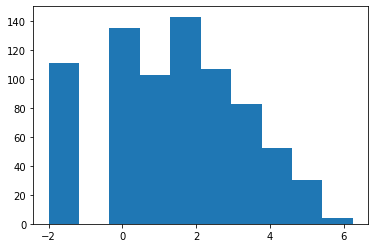

In [4]:
import numpy as np
import matplotlib.pyplot as plt
Pregnancies=df[["Pregnancies"]]
Pregnancies=2*(np.sqrt(Pregnancies)-1)
plt.hist(Pregnancies)
plt.show()

In [5]:
X=df.drop(["Outcome"],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y=df[["Outcome"]]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [8]:
X=X.drop(["Pregnancies"],axis=1)
X=pd.concat([Pregnancies, df],axis=1)

In [9]:
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [10]:
BForest=BalancedRandomForestClassifier(n_estimators=300,criterion="entropy",max_depth=4,min_samples_split=4,
                                       min_samples_leaf=1,max_features="sqrt",bootstrap=False,
                                       sampling_strategy="not majority",replacement=False,n_jobs=-1,
                                       warm_start=False,class_weight="balanced_subsample",random_state=0)
scores=cross_val_score(BForest,X,np.asarray(y).reshape(y.shape[0],),cv=12)
print("Accuracy: ",scores.mean())

Accuracy:  1.0


In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(BForest, X, np.asarray(y).reshape(y.shape[0],), cv=12)
AUC = roc_auc_score(y, y_pred)
print("AUC for the BalanaedRandomForest model with 12-fold cross validation: ",AUC)

AUC for the BalanaedRandomForest model with 12-fold cross validation:  1.0
